# 环境配置

In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

In [ ]:
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -v -e .

# 获取数据集

In [ ]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip

--2023-06-17 15:39:38--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13230222 (13M) [application/zip]
Saving to: ‘Watermelon87_Semantic_Seg_Mask.zip’

Watermelon87_Semant 100%[===================>]  12.62M  3.71MB/s    in 3.4s    

2023-06-17 15:39:42 (3.71 MB/s) - ‘Watermelon87_Semantic_Seg_Mask.zip’ saved [13230222/13230222]



In [ ]:
!unzip Watermelon87_Semantic_Seg_Mask.zip -d /content/data && rm Watermelon87_Semantic_Seg_Mask.zip

# 配置文件并训练模型

In [ ]:
!python /content/mmsegmentation/tools/train.py /content/mmsegmentation/configs/pspnet/pspnet_melon.py

06/17 16:34:29 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

In [ ]:
!rm -rf /content/mmsegmentation/work_dirs

# 模型预测

In [ ]:
import requests
from PIL import Image
from io import BytesIO

url = "https://p9.itc.cn/q_70/images03/20230614/d7c96d1cf185436098db0bde886de974.jpeg" # 替换为你想要下载的图像的URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.save("image.jpg")

In [ ]:
!python /content/mmsegmentation/demo/image_demo.py image.jpg /content/mmsegmentation/configs/pspnet/pspnet_melon.py /content/mmsegmentation/work_dirs/WatermelonDataset/iter_1500.pth --device cuda:0 --out-file result.jpg

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by local backend from path: /content/mmsegmentation/work_dirs/WatermelonDataset/iter_1500.pth
06/17 16:58:15 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


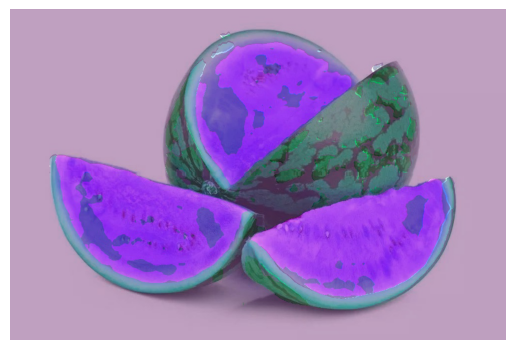

In [ ]:

import matplotlib.pyplot as plt
from PIL import Image

# 加载图像
img = Image.open("/content/mmsegmentation/result.jpg")

# 创建一个图像窗口
fig, ax = plt.subplots()

# 显示图像
ax.imshow(img)

# 隐藏坐标轴
ax.axis('off')

# 显示窗口
plt.show()